## 1. Vấn đề  <a class="anchor" id="1"></a>

Trong phần này, vấn đề được đặt ra đó là trả lời câu hỏi liệu ngày mai trời ở Úc sẽ mưa hay không. Để trả lời câu hỏi, thông qua bộ dữ liệu  **Rain in Australia**, ta sẽ xây dựng mô hình phân loại sử dụng mô hình hồi quy Logistics trong gói Scikit-Learn để dự đoán ngày mai ở Úc trời có mưa hay không, sau đó cải tiến mô hình và đưa ra một vài đề xuất để giúp cho việc dự đoán trở nên tốt hơn.

## 2. Thiết lập thư viện <a class="anchor" id="2"></a>


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


## 3. Tải dữ liệu  <a class="anchor" id="3"></a>


In [4]:
#Tải bộ dữ liệu mưa ở Úc
df = pd.read_csv('weatherAUS.csv')

## 4. Phân tích khám phá dữ liệu - Exploratory data analysis <a class="anchor" id="4"></a>

### Xem trước tập dữ liệu <a class="anchor" id="4.1"></a>

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Tóm tắt dữ liệu <a class="anchor" id="4.2"></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Nhận xét

- Ta có thể thấy có 142193 giá trị và 23 biến trong tập dữ liệu.
- Có thể thấy tập dữ liệu chứa hỗn hợp các biến định tính và định lượng.
- Biến định tính có kiểu dữ liệu `object`.
- Biến định lượng có kiểu dữ liệu `float64`.
- Ngoài ra, có một số giá trị bị thiếu trong tập dữ liệu.

### Kiểm tra thuộc tính thống kê của tập dữ liệu<a class="anchor" id="4.3"></a>

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


#### Nhận xét

- Lệnh `df.describe()` trên giúp chúng ta xem thuộc tính thống kê của các biến định tính và không đề cập tới biến định lượng. 
- Dựa vào bảng trên, ta có thể biết được số lượng các biến, giá trị trung bình, độ lệch chuẩn, giá trị lớn nhất, nhỏ nhất và tứ phân vị của các dữ liệu định lượng

## 5. Phân tích biến phụ thuộc <a class="anchor" id="5"></a>

### Phân tích biến mục tiêu `RainTomorrow` <a class="anchor" id="5.1"></a>

#### Kiểm tra giá trị bị khuyết

In [8]:
df['RainTomorrow'].isnull().sum()

0

#### Xem các giá trị của biến `RainTomorrow`

In [9]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

#### Tần suất của các giá trị 

In [10]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

#### Phần trăm phân bố tần suất của các giá trị

In [11]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

#### Trực quan hóa sự phân bổ tần số của biến `RainTomorrow`

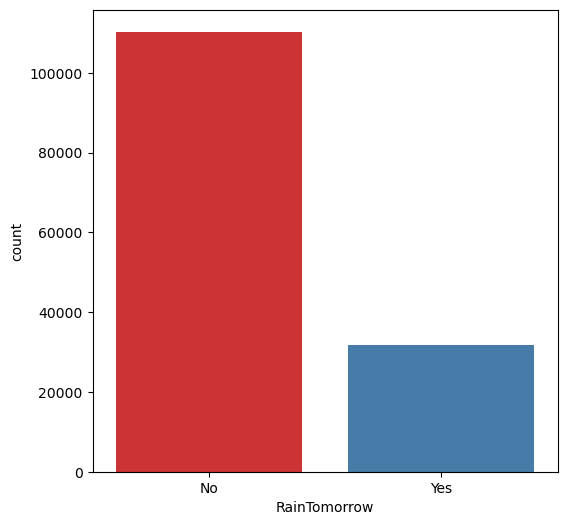

In [12]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

### Nhận xét <a class="anchor" id="5.2"></a>

- Biến `RainTomorrow` nhận 2 giá trị duy nhất là `No` và `Yes`.
- Giá trị`No` xuất hiện 77,58% tổng số lần và `Yes` xuất hiện 22,42% tổng số lần.
- Giá trị `No` có 110316 lần xuất hiện và giá trị `Yes` có 31877 lần xuất hiện

## 6. Phân tích biến độc lập <a class="anchor" id="6"></a>

Biến độc lập ở đây sẽ được phân làm 2 loại, biến định tính **categorical** và biến định lượng **numerical variables**. Có sự kết hợp của các biến định tính và định lượng trong tập dữ liệu. Các biến định tính có kiểu dữ liệu **object** và biến định lượng có kiểu dữ liệu **float64**.

### Khám phá biến định tính <a class="anchor" id="6.1"></a>

In [13]:
# Hiển thị những biến định tính
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Có {} biến định tính\n'.format(len(categorical)))
print('Các biến định tính bao gồm :', categorical)

Có 7 biến định tính

Các biến định tính bao gồm : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
# Xem trước các biến định tính
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No


### Vấn đề với các biến định tính <a class="anchor" id="6.2"></a>


#### Tính số học

Số lượng các nhãn ở các biến định tính được gọi là tính số học, lượng nhãn dán cho biến càng nhiều càng thể hiện biến có tính thứ hạng cao. Việc có tính thứ hạng cao sẽ gây là một số vấn đề trong quá trình xây dựng mô hình học máy, vì thế ở đây ta sẽ tiến hàng kiểm tra xem có biến nào có tính thứ bậc cao không. 


In [15]:
# Kiểm tra tính thứ bậc ở biến định tính
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


Ta có thể thấy rằng biến `Date` có lượng nhãn dán nhiều hơn đáng kể so với các biến khác, nên ta tiến hành xử lý biến này trước.

In [16]:
# Chuyển biến Date về định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Tạo biến năm
df['Year'] = df['Date'].dt.year

# Tạo biến tháng
df['Month'] = df['Date'].dt.month

# Tạo biến ngày
df['Day'] = df['Date'].dt.day

In [18]:
# Tóm tắt lại bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

Ta có thể thấy rằng có ba cột bổ sung được tạo từ biến `Date`, vì thế ta tiến hành bỏ cột date khỏi dữ liệu.

In [19]:
# Bỏ cột date
df.drop('Date', axis=1, inplace = True)

In [20]:
# Tóm tắt dữ liệu một lần nữa
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Ta có thể thấy rằng biến `Date` đã bị gỡ bỏ.


### Phân tích biến định tính <a class="anchor" id="6.3"></a>


In [21]:
# Hiển thị lại các biến định tính
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Có {} biến định tính\n'.format(len(categorical)))
print('Các biến định tính bao gồm :', categorical)

Có 6 biến định tính

Các biến định tính bao gồm : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Chúng ta có thể thấy rằng có 6 biến định tính trong tập dữ liệu. Biến `Date` đã bị xóa. Tiếp đến, chúng ta sẽ kiểm tra các giá trị còn thiếu trong các biến này..

In [22]:
# Kiểm tra giá trị bị khuyết trong biến định tính 
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Ta có thể thấy các biến `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` đều chứa giá trị bị khuyết.

#### Khám phá biến `Location` 

In [23]:
# In số lượng các nhãn trong biến Location
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [24]:
# Kiểm tra các nhãn trong biến Location
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [25]:
# Kiểm tra tần suất các nhãn trong biến Location
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


#### Khám phá biến `WindGustDir`

In [26]:
# In số lượng các nhãn trong biến WindGustDir
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [27]:
# Kiểm tra các nhãn trong biến WindGustDir
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [28]:
# Kiểm tra tần suất các nhãn trong biến WindGustDir 
df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

#### Khám phá biến `WindDir9am`

In [29]:
# In số lượng các nhãn trong biến WindDir9am 
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [30]:
# Kiểm tra các nhãn trong biến WindDir9am
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [31]:
# Kiểm tra tần suất các nhãn trong biến WindDir9am 
df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

#### Khám phá biến `WindDir3pm` 

In [32]:
# In số lượng các nhãn trong biến WindDir3pm
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [33]:
# Kiểm tra các nhãn trong biến WindDir3pm
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [34]:
# Kiểm tra tần suất các nhãn trong biến WindDir3pm
df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

#### Khám phá biến `RainToday` 

In [35]:
# In số lượng các nhãn trong biến RainToday 
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [36]:
# Kiểm tra các nhãn trong biến WindGustDir 
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [37]:
# Kiểm tra tần suất các nhãn trong biến WindGustDir 
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

### Khám phá biến định lượng <a class="anchor" id="6.4"></a>

In [38]:
# Hiển thị các biến định lượng
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Có {} biến định lượng\n'.format(len(numerical)))
print('Những biến định lượng bao gồm :', numerical)

Có 19 biến định lượng

Những biến định lượng bao gồm : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [39]:
# Hiển thị các biến
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Nhận xét <a class="anchor" id="6.5"></a>

- Ngoại trừ `Year`, `Month`, `Date`, còn có 16 biến định lượng.
- Các biến định lượng bao gồm `MinTemp`, `MaxTemp`, `Rainfall`, `Bốc hơi`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, ` Áp lực3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` và `Temp3pm`.
- Tất cả các biến định lượng này đều là biến liên tục..

### Vấn đề với biến định lượng <a class="anchor" id="6.6"></a>

#### Các giá trị bị khuyết trong biến định lượng

In [40]:
# Kiểm tra các giá trị bị khuyết
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

Ta có thể thấy rằng tất cả 16 biến đều bị thiếu dữ liệu

#### Giá trị ngoại lệ trong biến định lượng

In [41]:
# Hiển thị bẳng tóm tắt thống kê
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Ta có thể thấy rằng các biến `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` có khả năng cao chứa các giá trị ngoại lệ.

Text(0, 0.5, 'WindSpeed3pm')

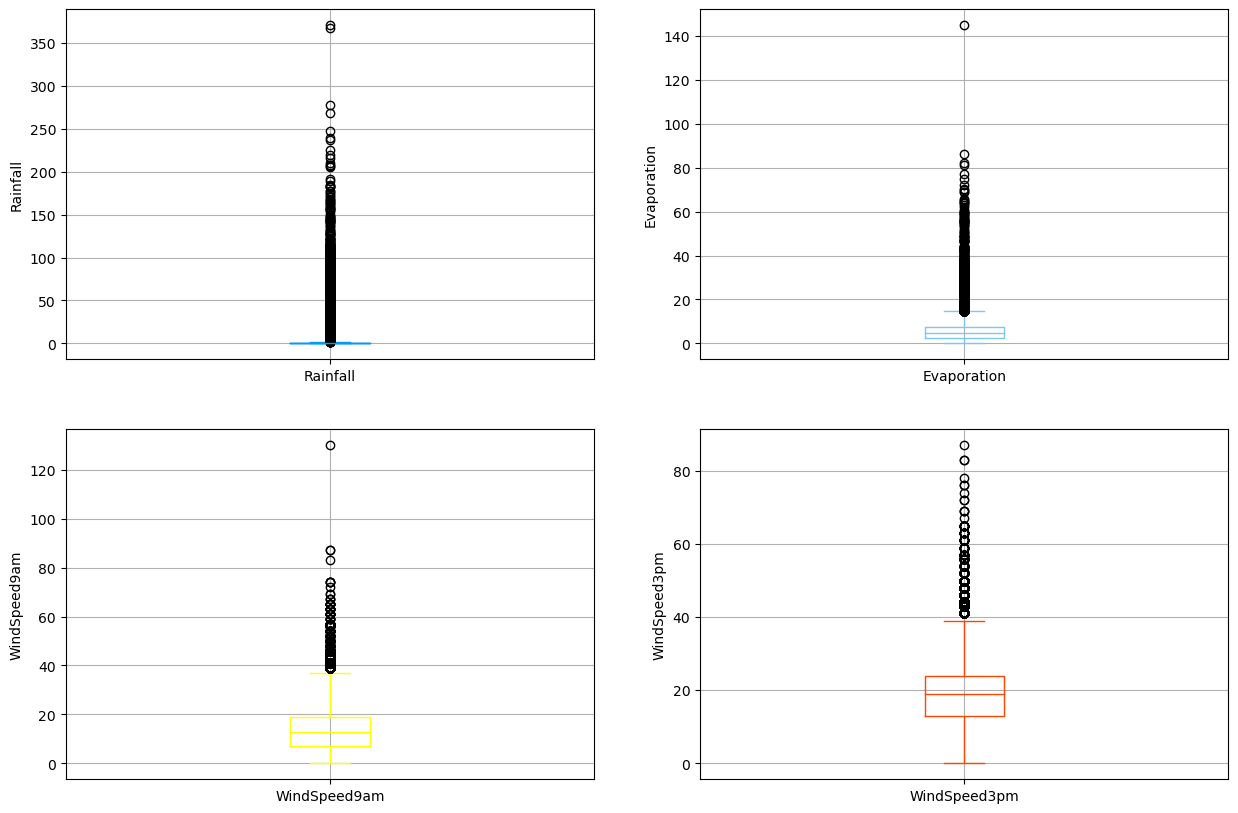

In [42]:
# Vẽ biểu đồ Box-plot

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall', color = "#069AF3")
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation', color = "#7BC8F6")
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am', color = "#FFFF00")
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm', color = "#FF4500")
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Dựa vào biểu đồ trên ta có thể thấy 4 biến `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` đều chứa rất nhiều giá trị ngoại lệ. 

### Kiểm tra phân phối của các biến  <a class="anchor" id="6.7"></a>

- Ta sẽ vẽ biểu đồ để kiểm tra phân phối xem liệu các biến thuộc phân phối chuẩn hay bị lệch.
- Nếu biến tuân theo phân phối chuẩn thì ta sẽ thực hiện phương pháp `Extreme Value Analysis`, nếu dữ liệu bị lệch ta sẽ tìm IQR (Interquantile range - Độ trải giữa).

Text(0, 0.5, 'RainTomorrow')

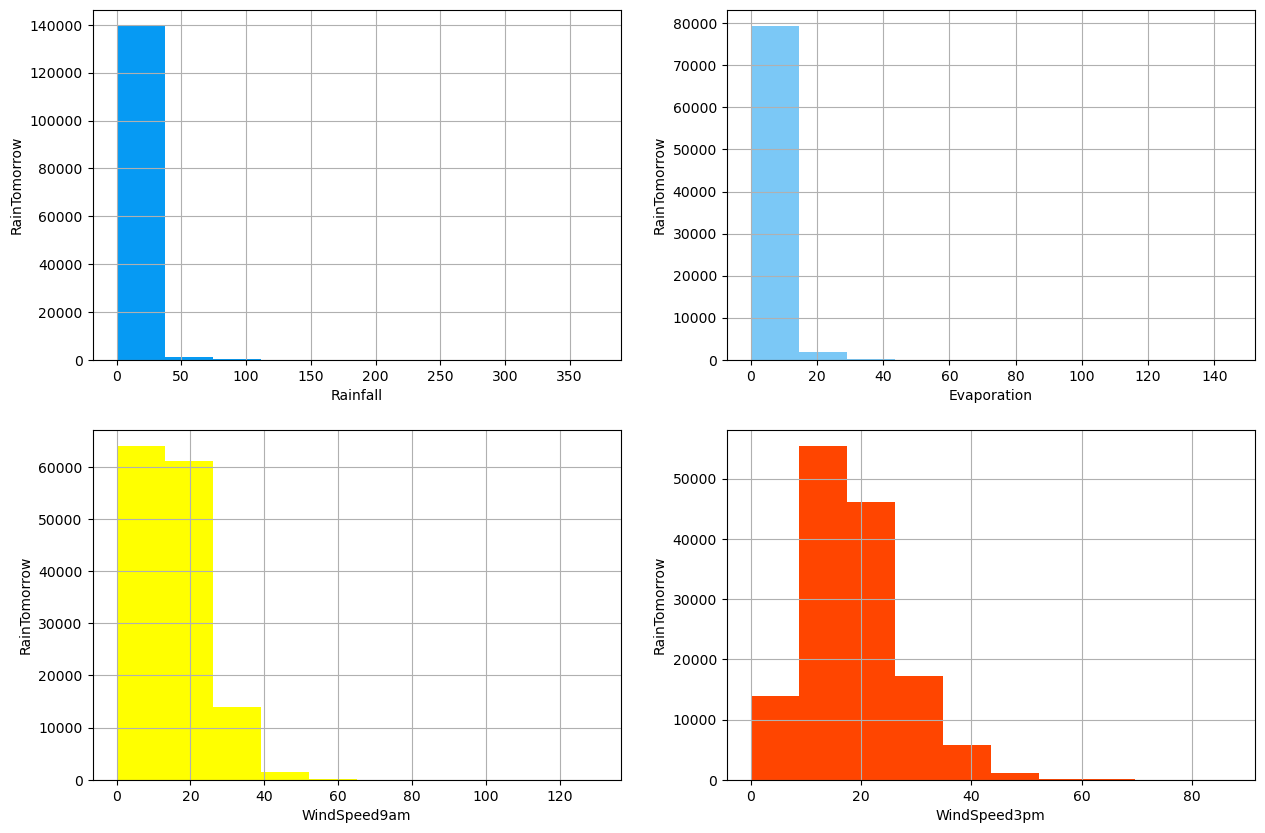

In [43]:
# Vẽ biểu đồ histogram để kiểm tra phân phối

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10, color = "#069AF3")
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10, color = "#7BC8F6")
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10, color = "#FFFF00")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10, color = "#FF4500")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Ta có thể thấy rằng cả 4 biến đều lệch phải, nên ta sẽ dùng đổ trải giữa để tìm các giá trị ngoại lai.

In [44]:
# Tìm giá trị ngoại lai cho biến Rainfall

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('giá trị ngoại lai của biến Rainfall < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


giá trị ngoại lai của biến Rainfall < -2.4000000000000004 hoặc > 3.2


Với biến `Rainfall`, giá trị nhỏ nhất và lớn nhất lần lượt là 0.0 và 371.0. Vì thế giá trị ngoại lai sẽ > 3.2.

In [45]:
# Tìm giá trị ngoại lai cho biến Evaporation

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('giá trị ngoại lai của biến Evaporation < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


giá trị ngoại lai của biến Evaporation < -11.800000000000002 hoặc > 21.800000000000004


Với biến `Evaporation`, giá trị nhỏ nhất và lớn nhất lần lượt là 0.0 và 145.0. Vì thế giá trị ngoại lai sẽ > 21.8.

In [46]:
# Tìm giá trị ngoại lai cho biến WindSpeed9am 

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('giá trị ngoại lai của biến WindSpeed9am < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


giá trị ngoại lai của biến WindSpeed9am < -29.0 hoặc > 55.0


Với biến `WindSpeed9am`, giá trị nhỏ nhất và lớn nhất lần lượt là 0.0 và 130.0. Vì thế giá trị ngoại lai sẽ > 55.0.

In [47]:
# Tìm giá trị ngoại lai cho biến WindSpeed3pm 

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('giá trị ngoại lai của biến WindSpeed3pm < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


giá trị ngoại lai của biến WindSpeed3pm < -20.0 hoặc > 57.0


Với biến `WindSpeed3pm`, giá trị nhỏ nhất và lớn nhất lần lượt là 0.0 và 87.0. Vì thế giá trị ngoại lai sẽ > 57.0.

## 7. Phân tích đa biến <a class="anchor" id="7"></a>

- Một bước quan trọng trong EDA là khám phá các mối quan hệ giữa các biến trong tập dữ liệu.
- Ta sẽ sử dụng biểu đồ nhiệt và biểu đồ phân tán khám phá các mối quan hệ trong tập dữ liệu.

In [48]:
correlation = df.corr()

### Biểu đồ nhiệt <a class="anchor" id="7.1"></a>

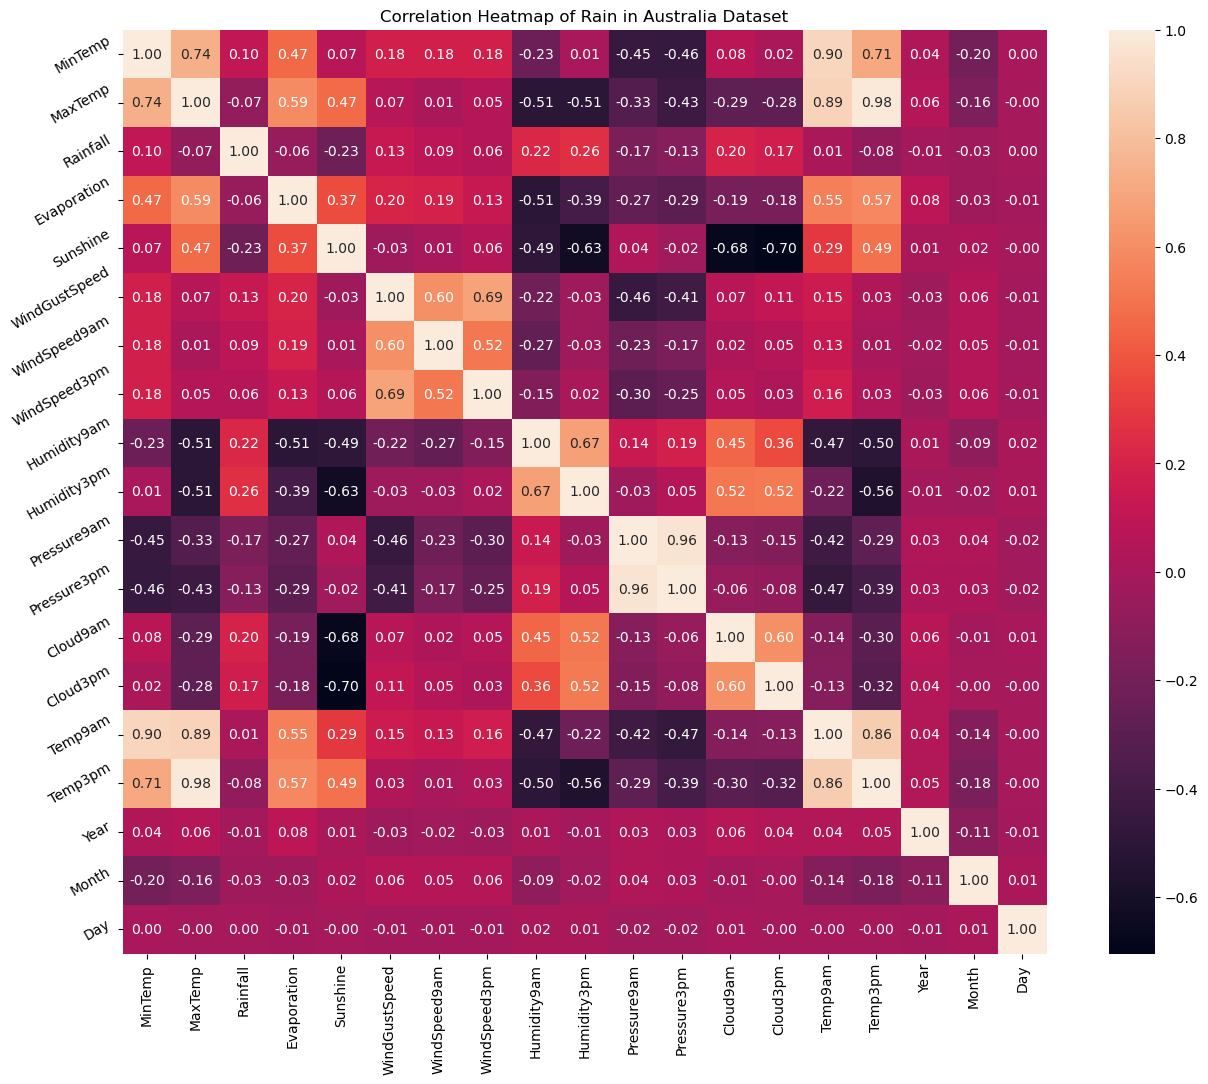

In [49]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Nhận xét

Từ biểu đồ tương quan ở trên, ta có thể kết luận rằng:
- Biến `MinTemp` và `MaxTemp` có mối tương quan dương cao (hệ số tương quan = 0,74).
- Các biến `MinTemp` và `Temp3pm` cũng có mối tương quan dương cũng cao cao (hệ số tương quan = 0,71).
- Các biến `MinTemp` và `Temp9am` có mối tương quan dương mạnh mẽ (hệ số tương quan = 0,90).
- Các biến `MaxTemp` và `Temp9am` có mối tương quan dương mạnh mẽ (hệ số tương quan = 0,89).
- Các biến `MaxTemp` và `Temp3pm` cũng có mối tương quan dương rất mạnh mẽ (hệ số tương quan = 0,98).
- Các biến `WindGustSpeed` và `WindSpeed3pm` có mối tương quan dương (hệ số tương quan = 0,69).
- Các biến `Pressure9am` và `Pressure3pm` có mối tương quan thuận chặt chẽ (hệ số tương quan = 0,96).
- Các biến `Temp9am` và `Temp3pm` có mối tương quan dương mạnh mẽ (hệ số tương quan = 0,86).

### Biểu đồ phân tán <a class="anchor" id="7.2"></a>

Trước hết, ta sẽ xác định các biến có mối tương quan dương cao, sau đó vẽ đồ thị phân tán để biểu diễn mối quan hệ giữa chúng

In [50]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

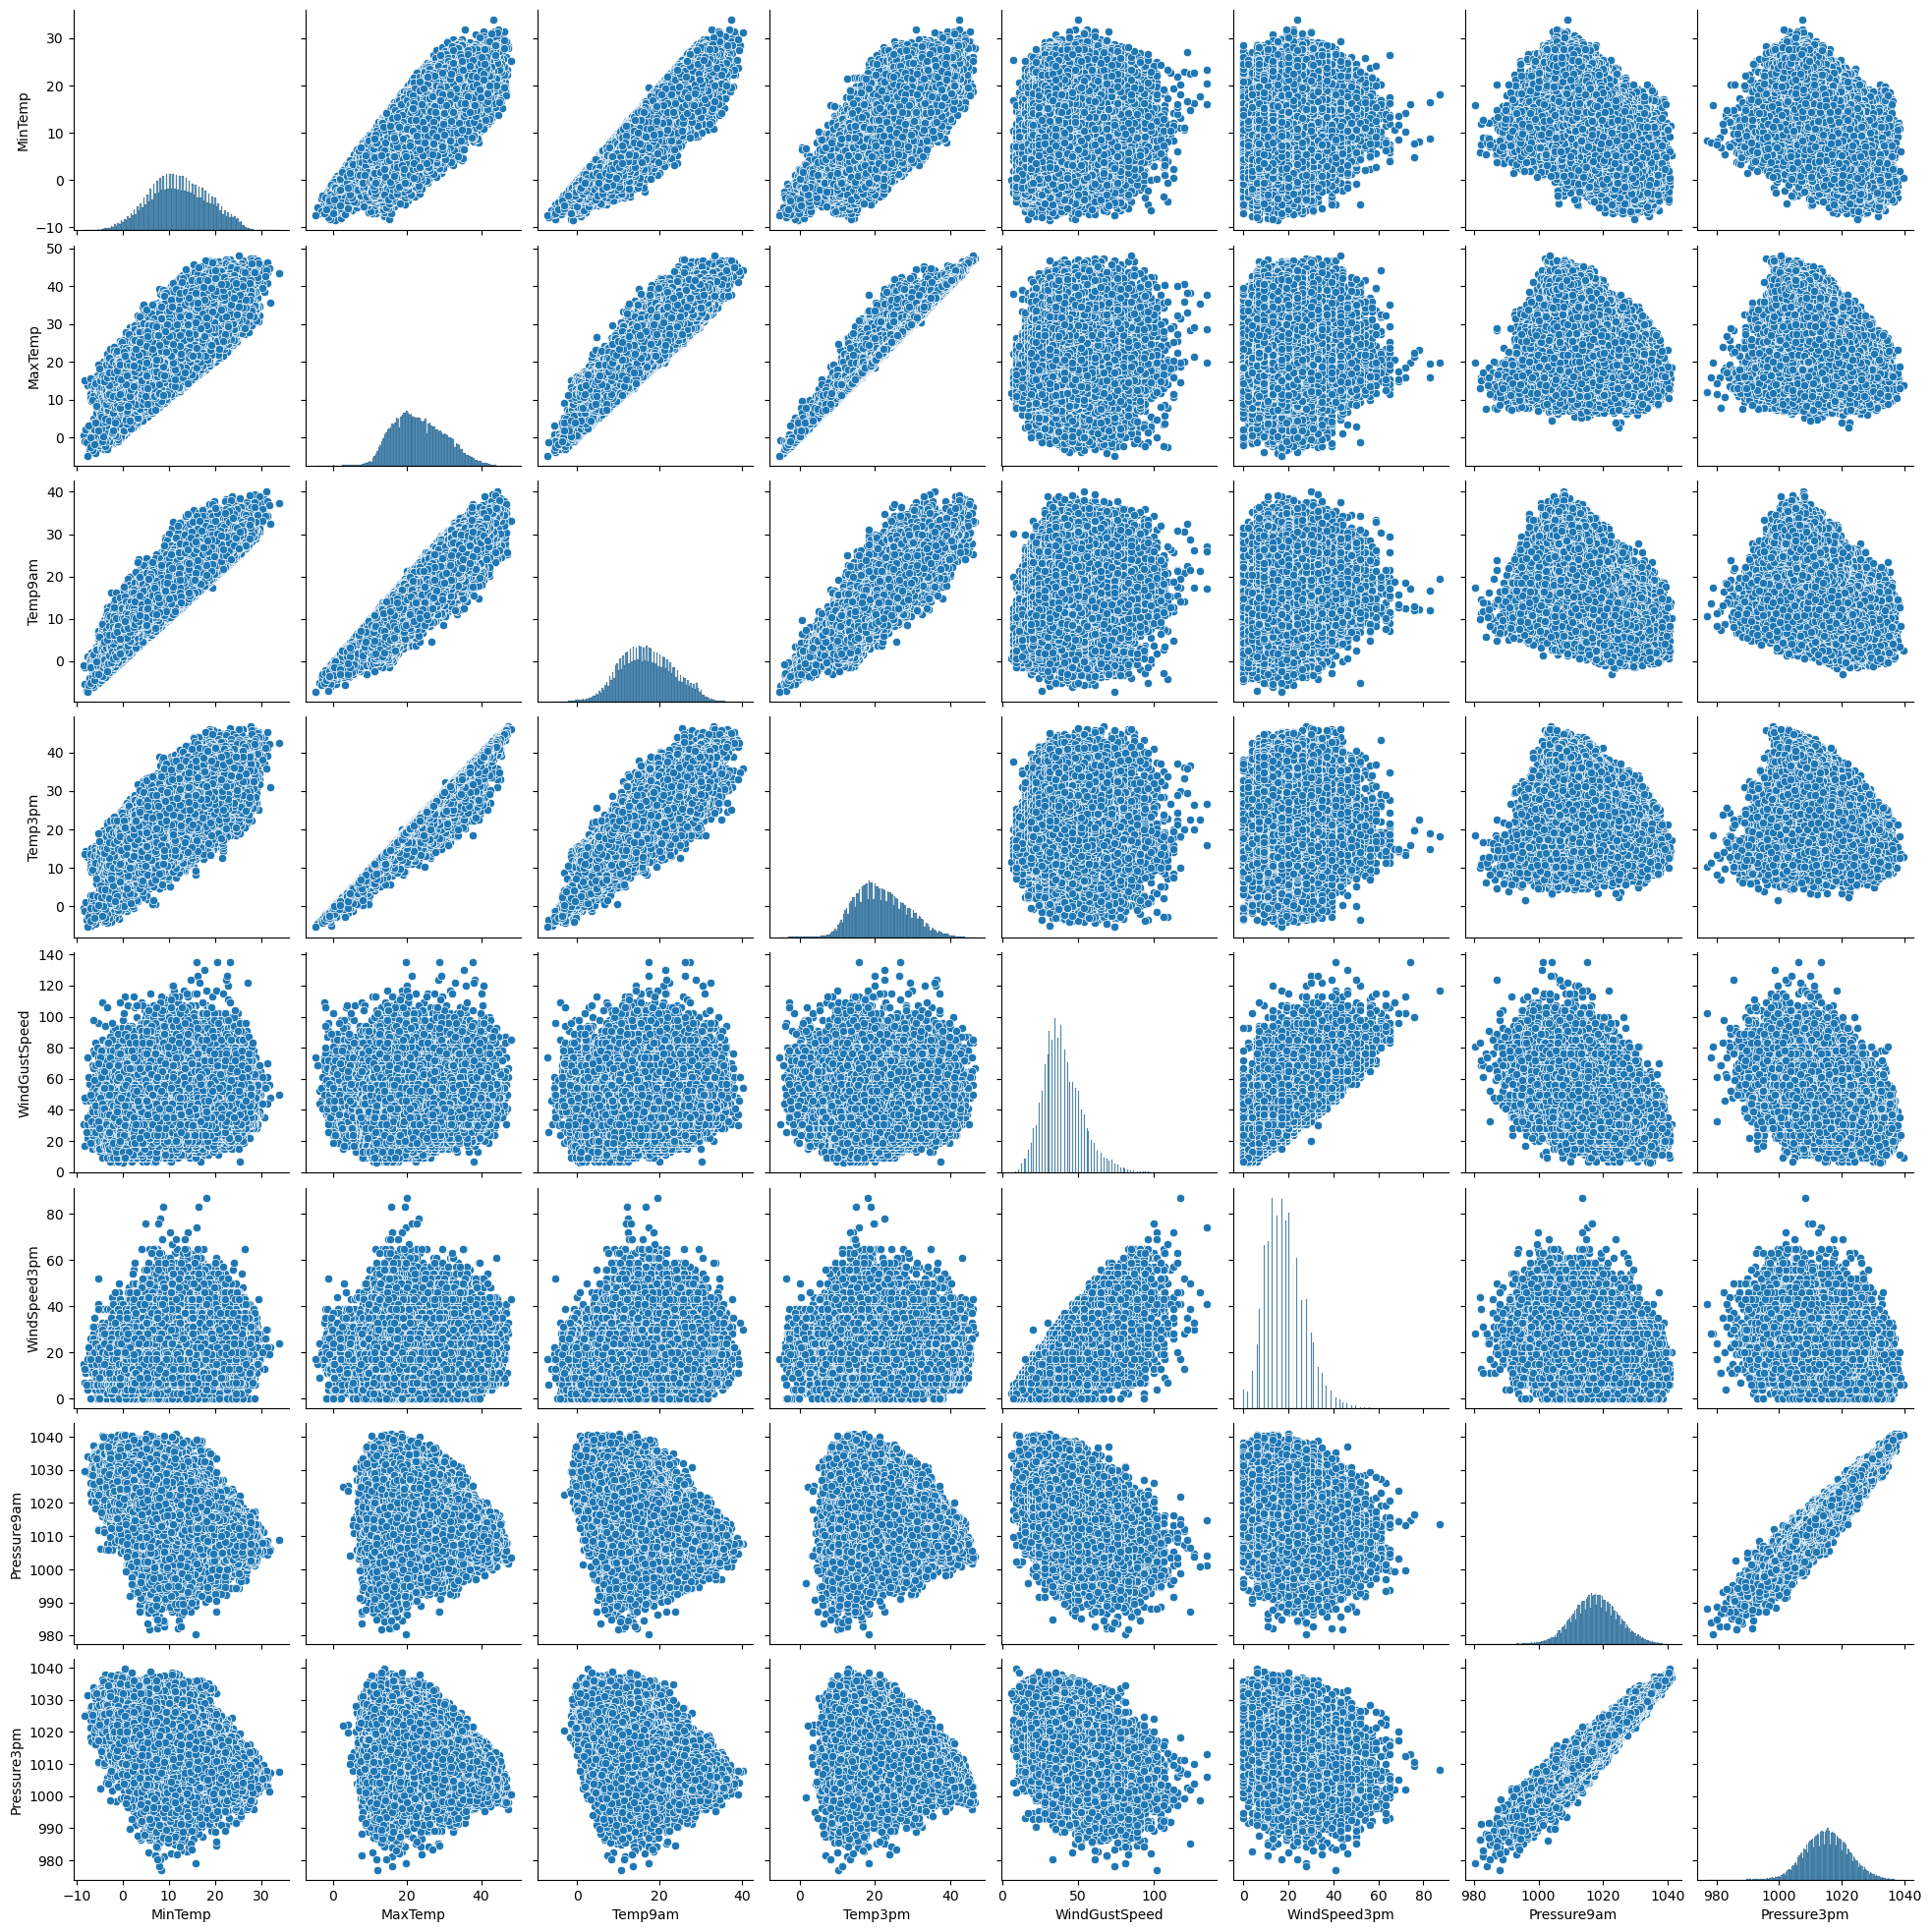

In [51]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### Nhận xét:

- Biến `num_var` bao gồm các biến `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`, `WindGustSpeed`, `WindSpeed3pm`, `Pressure9am` và `Pressure3pm`.
- Đồ thị trên trên thể hiện mối quan hệ giữa các biến này.

## 8. Khai báo vector đặc trưng và biến mục tiêu <a class="anchor" id="8"></a>

In [52]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## 9. Chia dữ liệu thành tập huấn luyện và kiểm tra <a class="anchor" id="9"></a>

In [53]:
# Chia dữ liệu X và y thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
# kiểm tra biến X_train và X_test
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

## 10. Feature Engineering <a class="anchor" id="10"></a>


**Feature Engineering** là quá trình chuyển đổi dữ liệu thô thành các tính năng hữu ích giúp chúng ta hiểu rõ hơn về mô hình của mình và tăng khả năng dự đoán của nó. Ta sẽ thực hiện Feature Engineering trên các loại biến khác nhau.


Đầu tiên, ta sẽ hiển thị lại các biến định lượng và định tính.

In [55]:
# kiểm tra loại dữ liệu của X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [56]:
# Hiển thị biến định tính
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [57]:
# Hiển thị biến định lượng
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Xử lý missing value trong biến định lượng <a class="anchor" id="10.1"></a>

In [58]:
# kiểm tra giá trị bị khuyết của dữ liệu định lượng trong tập X_train
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [59]:
# kiểm tra giá trị bị khuyết của dữ liệu định lượng trong tập X_test
X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [60]:
# Kiểm tra tỉ lệ dữ liệu bị khuyết của biến định lượng trong tập huấn luyện
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


#### Giả định

Bài viết giả định rằng dữ liệu bị thiếu hoàn toàn ngẫu nhiên (missing completely at random - MCAR). Có hai phương pháp có thể được sử dụng để xử lý các giá trị bị thiếu. Một là sử dụng giá trị trung vị hoặc trung bình, hai là điền ngẫu nhiên. Khi có các giá trị ngoại lệ xuất hiện trong tập dữ liệu, chúng ta nên sử dụng giá trị trung vị cho biến định lượng và giá trị mode cho biến định tính. Vì vậy, ta sẽ sử dụng giá trị trung vị và mode để điền khuyết dữ liệu.

Các giá trị bị thiếu sẽ được điền bằng các thước đo thống kê thích hợp, trong trường hợp này là giá trị trung vị. Việc tính toán phải được thực hiện trên tập huấn luyện và sau đó được truyền đến tập kiểm tra. Điều đó có nghĩa là các biện pháp thống kê được sử dụng để điền vào các giá trị còn thiếu cả trong tập huấn luyện và tập kiểm tra, chỉ nên được trích xuất từ tập huấn luyện. Điều này là để tránh bị hiện tượng quá khớp (overfitting).

In [61]:
# gán các giá trị bị thiếu trong X_train và X_test với trung vị tương ứng
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [62]:
# kiểm tra lại các giá trị bị thiếu ở các biến định lượng trong tập X_train
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [63]:
# kiểm tra các giá trị bị thiếu ở các biến định lượng trong tập X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Ta có thể thấy rằng không có giá trị nào bị thiếu ở các biến định lượng của tập huấn luyện và tập kiểm tra.

### Xử lý missing value trong biến định tính <a class="anchor" id="10.2"></a>

In [64]:
# Kiểm tra tỉ lệ dữ liệu bị khuyết của biến định tính trong tập huấn luyện
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [65]:
# điền các giá trị bị thiếu ở biến định tính bằng giá trị mode
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [66]:
# kiểm tra lại các giá trị bị thiếu ở các biến định tính trong tập X_train
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [67]:
# kiểm tra lại các giá trị bị thiếu ở các biến định tính trong tập X_test
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Kiểm tra lần cuối biến định tính và định lượng <a class="anchor" id="10.3"></a>

In [68]:
# kiểm tra giá trị bị thiếu trong tập X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [69]:
# kiểm tra giá trị bị thiếu trong tập X_test
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Ta có thể thấy rằng không còn missing value ở trong tập X_train và X_test.

### Xử lý giá trị ngoại lai ở biến định lượng <a class="anchor" id="10.4"></a>

Ta đã tìm thấy rằng các biến `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` chứa các giá trị ngoại lệ. Trong phần này ta sẽ tiến hành loại bỏ chúng.

In [70]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [71]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [72]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [73]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [74]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [75]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Ta thấy rằng các biến `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` không còn chứa các giá trị ngoại lệ nữa.

### Mã hóa các biến định tính <a class="anchor" id="10.5"></a>

In [76]:
# hiển thị các biến định tính
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [77]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
110803,Witchcliffe,S,SSE,S,No
87289,Cairns,ENE,SSE,SE,Yes
134949,AliceSprings,E,NE,N,No
85553,Cairns,ESE,SSE,E,No
16110,Newcastle,W,N,SE,No


In [78]:
# Mã hóa biến RainToday
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [79]:
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [80]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
110803,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
87289,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
134949,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
85553,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16110,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


Ta thấy rằng 2 biến `RainToday_0` và `RainToday_1` đã được tạo từ biến `RainToday`.

Tiến hành cập nhật tập `X_train`.

In [81]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [82]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


Tiến hành cập nhật tập `X_test`.

In [83]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [84]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


Tập huấn luyện và kiểm tra đã ổn định, sau đây ta sẽ tiến hành bước chuẩn hóa dữ liệu (Feature Scaling)

## 11. Feature Scaling <a class="anchor" id="11"></a>

In [85]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cols = X_train.columns

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [89]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [90]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 12. Xây dựng mô hình <a class="anchor" id="12"></a>

Trước tiên ta sẽ sử dụng 3 mô hình phân loại phổ biến bao gồm: Naive Bayes, Decision Tree và Logistics Regression để tìm ra mô hình có độ chính xác cao nhất và tiến hành cải tiến mô hình.

### Naive Bayes Classification <a class="anchor" id="12.1"></a>

In [91]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
print("Accuracy of Naive Bayes Algorithm: ",nb.score(X_test,y_test))

Accuracy of Naive Bayes Algorithm:  0.65111290833011


### Decision Tree Classification <a class="anchor" id="12.2"></a>

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy score for Decision Tree Classification: " ,dt.score(X_test,y_test))

Accuracy score for Decision Tree Classification:  0.7942262386159851


### Logistics Regression <a class="anchor" id="12.3"></a>

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
print("Accuracy score for Logistics regression:", logreg.score(X_test,y_test))

Accuracy score for Logistics regression: 0.850170540455009


Ta có thể thấy mô hình hồi quy Logistics đem lại độ chính xác cao nhất trong cả 3, ta sẽ lựa chọn và đánh giá mô hình này. 

## 13. Kết quả dự báo <a class="anchor" id="13"></a>

In [94]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

### Phương pháp predict_proba


Phương pháp **predict_proba** đưa ra xác suất cho biến mục tiêu (0 và 1) trong trường hợp này, ở dạng mảng, `0 tức khả năng không mưa` và `1 tức khả năng sẽ mưa.`

In [95]:
# xác suất kết quả đạt 0 - không mưa
logreg.predict_proba(X_test)[:,0]

array([0.91387989, 0.83563538, 0.82035786, ..., 0.97675236, 0.79856443,
       0.30735485])

In [96]:
# xác suât kết quả đạt 1 - mưa
logreg.predict_proba(X_test)[:,1]

array([0.08612011, 0.16436462, 0.17964214, ..., 0.02324764, 0.20143557,
       0.69264515])

## 14. Kiểm tra độ chính xác <a class="anchor" id="14"></a>

In [97]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8502


Ở đây, **y_test** là nhãn thực và **y_pred_test** là nhãn được dự đoán trong tập kiểm tra.

### So sánh độ chính xác của tập huấn luyện và tập kiểm tra <a class="anchor" id="14.1"></a>

In [98]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [99]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8476


### Kiểm tra hiện tượng chưa khớp và quá khớp dữ liệu <a class="anchor" id="14.2"></a>

In [100]:
# in điểm trên tập huấn luyện và tập kiểm tra
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8476
Test set score: 0.8502


Điểm chính xác của tập huấn luyện là 0,8476 trong khi độ chính xác của tập kiểm tra là 0,8502. Hai giá trị này khá tương đương nhau. Vì vậy, không có hiện tượng mô hình bị quá khớp.


Trong Hồi quy logistic, ta sử dụng giá trị mặc định là C = 1. Nó mang lại hiệu suất tốt với độ chính xác khoảng 85% trên cả tập huấn luyện và tập kiểm tra. Nhưng hiệu suất của mô hình trên cả tập huấn luyện và tập kiểm tra đều rất tương đương nhau. Đó có thể là trường hợp mô hình bị hiện tượng chưa khớp.Vì vậy, ta sẽ tăng C để có một mô hình linh hoạt hơn.

In [101]:
# gán C=100 trong mô hình 
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [102]:
# in điểm trên tập huấn luyện và tập kiểm tra
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8505


Chúng ta có thể thấy rằng, C=100 mang lại độ chính xác của tập kiểm tra cao hơn và độ chính xác của tập huấn luyện cũng tăng lên một chút. Vì vậy, chúng ta có thể kết luận rằng một mô hình phức tạp hơn sẽ hoạt động tốt hơn.

Ta sẽ điều tra xem điều gì sẽ xảy ra nếu chúng ta sử dụng mô hình với C=0,01.

In [103]:
# gán C=0.01 trong mô hình
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [104]:
# in điểm trên tập huấn luyện và tập kiểm tra
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8409
Test set score: 0.8448


Nếu chúng ta sử dụng mô hình với C=0,01, thì cả độ chính xác của tập huấn luyện và tập kiểm tra đều giảm so với các tham số mặc định.

### So sánh độ chính xác của mô hình với null accuracy <a class="anchor" id="14.3"></a>

Độ chính xác của mô hình là 0,8502. Tuy nhiên, ta không thể nói rằng mô hình dự đoán rất tốt dựa trên độ chính xác trên. Chúng ta phải so sánh nó với **null accuracy**. Null accuracy là độ chính xác có thể đạt được bằng cách luôn dự đoán lớp thường xuyên nhất.

In [105]:
# kiểm tra phân phối các giá trị trong tập kiểm tra
y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

Ta có thể thấy rằng số lần xuất hiện của lớp thường xuyên nhất là 22067. Vì vậy, ta có thể tính toán độ chính xác bằng 0 bằng cách chia 22067 cho tổng số lần xuất hiện.

In [106]:
# kiểm tra null accuracy
null_accuracy = (22067/(22067+6372))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


#### Nhận xét

Dựa vào phân tích ở trên, ta có thể kết luận rằng độ chính xác của mô hình phân loại là rất tốt. Tiếp đến, ta sử dụng ma trận nhầm lẫn - Confusion matrix để đánh giá độ chính xác của mô hình

## 15. Confusion matrix <a class="anchor" id="15"></a>


Ma trận nhầm lẫn là một công cụ để tóm tắt hiệu suất của thuật toán phân loại. Ma trận nhầm lẫn sẽ cho chúng ta một bức tranh rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi do mô hình tạo ra. Nó cung cấp bản tóm tắt các dự đoán đúng và sai được chia theo từng danh mục.

Bốn loại kết quả có thể xảy ra:

**True Positives (TP)** – True Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát đó thực sự thuộc về lớp đó.

**True Negatives (TN)** – True Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định và quan sát đó thực sự không thuộc về lớp đó.

**False Positives (FP)** – False Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một loại nhất định nhưng thực tế quan sát đó không thuộc về loại đó. Loại lỗi này được gọi là **Lỗi loại I.**

**False Negatives (FN)** – False Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định nhưng quan sát đó thực sự thuộc về lớp đó. Đây là một lỗi rất nghiêm trọng và được gọi là **Lỗi loại II.**

In [107]:
# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3086  3286]]

True Positives(TP) =  20892

True Negatives(TN) =  3286

False Positives(FP) =  1175

False Negatives(FN) =  3086


Ma trận nhầm lẫn hiển thị `20892 + 3286 = 24178 dự đoán đúng` và `3086 + 1175 = 4261 dự đoán sai`.

- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3286

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3086 `(Type II error)`

<AxesSubplot:>

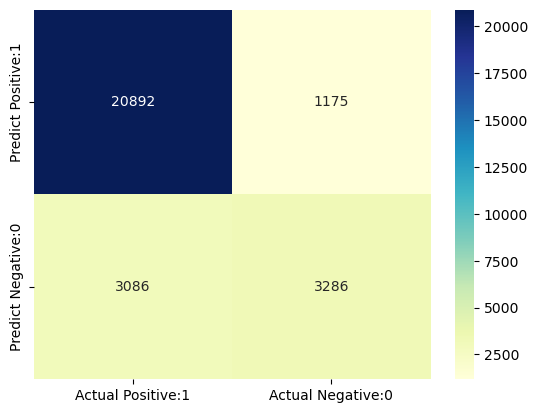

In [108]:
# Vẽ ma trận nhầm lẫn
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 16. Đánh giá <a class="anchor" id="16"></a>

### Báo cáo phân loại - Classification Report <a class="anchor" id="16.1"></a>

**Classification report** là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị các chỉ số như **precision**, **recall**, **f1** and **support**.

In [109]:
# hiển thị bảng báo cáo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Độ chính xác phân loại - Classification Accuracy <a class="anchor" id="16.2"></a>

In [110]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [111]:
# hiển thị classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8502


### Lỗi phân loại - Classification Error <a class="anchor" id="16.3"></a>

In [112]:
# hiển thị classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1498


### Độ chính xác - Precision <a class="anchor" id="16.4"></a>

**Precision** có thể được định nghĩa là tỷ lệ phần trăm các kết quả tích cực được dự đoán chính xác trong số tất cả các kết quả tích cực được dự đoán. Nó có thể được tính bằng tỷ lệ giữa kết quả true positives (TP) với tổng kết quả true and false positives (TP + FP). 

In [113]:
# hiển thị precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9468


### Recall <a class="anchor" id="16.5"></a>

Recall được định nghĩa là tỷ lệ phần trăm các kết quả tích cực được dự đoán chính xác trong số tất cả các kết quả tích cực thực tế. Recall được tính bằng tỷ lệ giữa true positives (TP) với tổng true positives và false negatives (TP + FN).  **Recall** còn được gọi là **Sensitivity**.

In [114]:
# hiên =r thị Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8713


### Tỉ lệ True Positive <a class="anchor" id="16.8"></a>

**True Positive Rate** tương đương với **Recall**.

In [115]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8713


### Tỉ lệ False Positive <a class="anchor" id="16.9"></a>

In [116]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2634


### Specificity <a class="anchor" id="16.10"></a>

In [117]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7366


## 17. Tùy chỉnh mức ngưỡng <a class="anchor" id="17"></a>

In [118]:
# in 10 xác suất dự đoán đầu tiên của hai lớp 0 và 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.91387989, 0.08612011],
       [0.83563538, 0.16436462],
       [0.82035786, 0.17964214],
       [0.99025716, 0.00974284],
       [0.95727663, 0.04272337],
       [0.97992442, 0.02007558],
       [0.1784425 , 0.8215575 ],
       [0.23482505, 0.76517495],
       [0.90053189, 0.09946811],
       [0.85483216, 0.14516784]])

### Nhận xét   
    
- Trong mỗi hàng, các số có tổng bằng 1.

- Có 2 cột tương ứng với 2 lớp - 0 và 1.
    - Loại 0 - xác suất dự đoán ngày mai không mưa.
    - Loại 1 - xác suất dự đoán ngày mai có mưa.

- Tầm quan trọng của xác suất dự đoán
    - Chúng ta có thể xếp hạng các quan sát theo xác suất có mưa hoặc không có mưa.

- quá trình predict_proba
    - Dự đoán xác suất
    - Chọn lớp có xác suất cao nhất

- Mức ngưỡng phân loại
    - Có ngưỡng phân loại là 0,5.
    - Loại 1 - khả năng có mưa được dự đoán nếu xác suất > 0,5.
    - Loại 0 - xác suất không mưa được dự đoán nếu xác suất < 0,5.

In [119]:
# lưu trữ xác suất vào y_pred_prob_df
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])
y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.913880,0.086120
1,0.835635,0.164365
2,0.820358,0.179642
3,0.990257,0.009743
4,0.957277,0.042723
5,0.979924,0.020076
6,0.178442,0.821558
7,0.234825,0.765175
8,0.900532,0.099468
9,0.854832,0.145168


In [120]:
# in 10 xác suất dự đoán đầu tiên cho lớp 1 - Xác suất mưa
logreg.predict_proba(X_test)[0:10, 1]

array([0.08612011, 0.16436462, 0.17964214, 0.00974284, 0.04272337,
       0.02007558, 0.8215575 , 0.76517495, 0.09946811, 0.14516784])

In [121]:
# lưu trữ xác suất dự đoán cho lớp 1 - Xác suất mưa
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

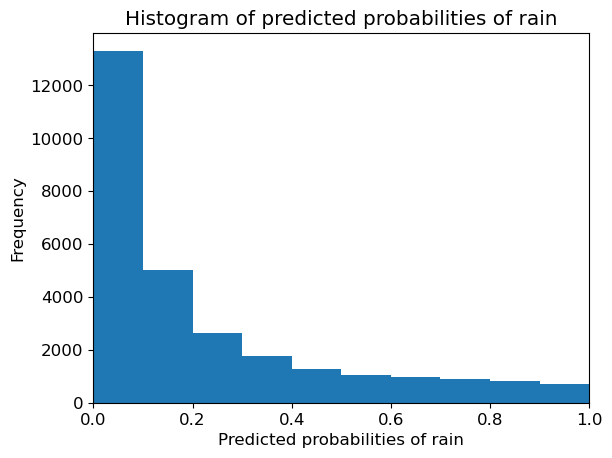

In [122]:
# vẽ biểu đồ histogram xác suất dự đoán
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of rain')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Nhận xét

- Có thể thấy biểu đồ trên có độ lệch rất lớn.
- Cột đầu tiên cho chúng ta biết có khoảng 15000 quan sát với xác suất từ 0,0 đến 0,1.
- Có số lượng nhỏ quan sát có xác suất > 0,5.
- Vì vậy, số lượng quan sát nhỏ này dự đoán rằng ngày mai sẽ có mưa.
- Đa số quan sát dự đoán ngày mai sẽ không có mưa.

### Giảm mức ngưỡng

In [123]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, threshold = i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    cm1 = confusion_matrix(y_test, y_pred2)  
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12725  9342]
 [  547  5825]] 

 with 18550 correct predictions,  

 9342 Type I errors( False Positives),  

 547 Type II errors( False Negatives),  

 Accuracy score:  0.6522732866837793 

 Sensitivity:  0.9141556811048337 

 Specificity:  0.5766529206507455 



With 0.2 threshold the Confusion Matrix is  

 [[17067  5000]
 [ 1234  5138]] 

 with 22205 correct predictions,  

 5000 Type I errors( False Positives),  

 1234 Type II errors( False Negatives),  

 Accuracy score:  0.7807939800977531 

 Sensitivity:  0.8063402385436284 

 Specificity:  0.7734173199800607 



With 0.3 threshold the Confusion Matrix is  

 [[19080  2987]
 [ 1873  4499]] 

 with 23579 correct predictions,  

 2987 Type I errors( False Positives),  

 1873 Type II errors( False Negatives),  

 Accuracy score:  0.8291079151868912 

 Sensitivity:  0.7060577526679221 

 Specificity:  0.8646395069560883 



With 0.4 threshold the Confusion Matrix is  

 [[20191  187

### Nhận xét

- Trong các bài toán nhị phân, ngưỡng 0,5 được sử dụng theo mặc định để chuyển đổi xác suất dự đoán thành dự đoán lớp.
- Có thể điều chỉnh ngưỡng để tăng độ nhạy hoặc độ đặc hiệu.
- Độ nhạy (Sensitivity) và độ đặc hiệu (specificity) có mối quan hệ nghịch đảo. Tăng cái này bao giờ cũng giảm cái kia và ngược lại.
- Chúng ta có thể thấy rằng việc tăng mức ngưỡng sẽ làm tăng độ chính xác.
- Điều chỉnh mức ngưỡng phải là một trong những bước cuối cùng bạn thực hiện trong quá trình xây dựng mô hình.

## 18. ROC - AUC <a class="anchor" id="18"></a>

AUC - ROC là một phương pháp tính toán hiệu suất của một mô hình phân loại theo các ngưỡng phân loại khác nhau. AUC là từ viết tắt của Area Under The Curve còn ROC viết tắt của Receiver Operating Characteristics. ROC là một đường cong biểu diễn xác suất và AUC biểu diễn mức độ phân loại của mô hình.

### ROC Curve

ROC là đường cong biểu diễn khả năng phân loại của một mô hình phân loại tại các ngưỡng. Đường cong này dựa trên hai chỉ số **True Positive Rate (TPR)** và **False Positive Rate (FPR)**:

**True Positive Rate (TPR)**: hay còn được gọi là chỉ số **Recall**, đây là tỷ lệ các trường hợp phân loại đúng dương tính (TP) trên tổng số các trường hợp thực tế là dương tính (TP + FN). Nó có tác dụng đánh giá mức độ dự báo chính xác của mô hình trên nhóm dương tính. Khi giá trị của nó càng cao, mô hình dự báo càng tốt trên nhóm dương tính. TPR được tính bằng tỉ lệ `TP/(TP + FN).`

**False Positive Rate (FPR)**: là tỷ lệ dự báo sai các trường hợp thực tế là âm tính thành dương tính (FP) trên tổng số các trường hợp thực tế là âm tính (FP + TN). Trái với TPR, một mô hình có FPR càng thấp thì mô hình càng chuẩn xác vì sai số của nó trên nhóm âm tính càng thấp.. FPR được tính bằng tỉ lệ `FP to (FP + TN).`

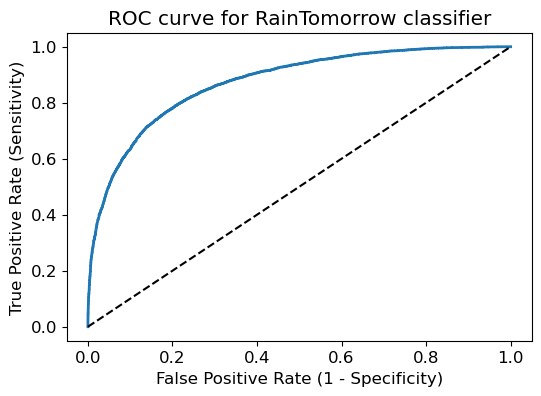

In [124]:
# Vẽ đường cong ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC giúp ta chọn mức ngưỡng có thể cân bằng độ nhạy (sensitivity) và độ đặc hiệu (specificity) cho một bối cảnh cụ thể.

### ROC  AUC

AUC là chỉ số được tính toán dựa trên đường cong ROC (receiving operating curve) nhằm đánh giá khả năng phân loại của mô hình tốt như thế nào. Phần diện tích gạch chéo nằm dưới đường cong ROC và trên trục hoành là AUC (area under curve). Khi diện tích này càng lớn thì đường cong ROC có xu hướng tiệm cận đường thẳng và khả năng phân loại của mô hình càng tốt. Một mô hình phân loại hoàn hảo sẽ có ROC AUC bằng 1, trong khi một mô hình phân loại ngẫu nhiên sẽ có ROC AUC bằng 0,5.

In [125]:
# Tính ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


### Nhận xét 

- Chỉ số ROC AUC nhằm đánh giá khả năng phân loại của mô hình, AUC càng cao thì khả năng phân loại càng tốt.
- Ở đây, chỉ số AUC có giá trị 0.8729, ta có thể thấy mô hình đang dự đoán rất tốt liệu trời có mưa hay không

In [126]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


## 19. Đánh giá và cải tiến mô hình <a class="anchor" id="19"></a>

Trong phần này, ta sẽ sử dụng một số kỹ thuật để cải thiện hiệu suất của mô hình. 3 kỹ thuật được sử dụng trong bài toán để cải thiện hiệu suất của mô hình bao gồm phương pháp `recursive feature elimination`, `k-fold cross validation` và `hyperparameter optimization using GridSearchCV`. Also, Ngoài ra, ta sẽ thử sử dụng các mô hình phân loại khác như `Support Vector Machine` và `Random Forest classification` để đánh giá liệu các mô hình này có độ chính xác cao hơn không 

### Recursive Feature Elimination with Cross Validation <a class="anchor" id="19.1"></a>

`Recursive feature elimination (RFE)` là kỹ thuật lựa chọn các đặc trưng quan trọng và cần thiết trong mô hình. Các mô hình sẽ được xây dựng dựa trên các đặc trưng có sẵn, sau đó tiến hành loại bỏ các đặc trưng không có hoặc ít có tác động mô hình. Kỹ thuật này rất hữu ích, đặc biệt trong trường hợp mô hình có quá nhiều đặc trưng làm giảm tốc độ xử lý của mô hình. 

`Recursive Feature Elimination with Cross-Validated (RFECV) feature selection` là kỹ thuật chọn tập hợp con các tính năng tốt nhất bằng cách loại bỏ các tính năng từ 0 đến N lặp đi lặp lại bằng cách sử dụng kỹ thuật recursive feature elimination. Sau đó, nó chọn tập hợp con tốt nhất dựa trên độ chính xác accuracy, cross-validation score hoặc roc-auc của mô hình.

In [127]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [128]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 111


In [129]:
# chuyển đổi tập huấn luyện
X_train_rfecv = rfecv.transform(X_train)

# phân loại tập huấn luyện
logreg.fit(X_train_rfecv, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [130]:
# kiểm tra khả năng phân loại trên tập kiểm tra
X_test_rfecv = rfecv.transform(X_test)
y_pred_rfecv = logreg.predict(X_test_rfecv)

In [131]:
# in độ chính xác trung bình trên tập kiểm tra và các nhãn 
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.8499


Độ chính xác của mô hình ban đầu (Logistics) là 0,8502 trong khi điểm chính xác của kỹ thuật RFECV là 0,8499. Ta có thể thấy kỹ thuật RFECV đem lại kết quả khá tốt nhưng không tốt bằng mô hình hồi quy Logistics.

### Ma trận nhầm lẫn

In [132]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_rfecv)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP1) = ', cm1[0,0])
print('\nTrue Negatives(TN1) = ', cm1[1,1])
print('\nFalse Positives(FP1) = ', cm1[0,1])
print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[20892  1175]
 [ 3093  3279]]

True Positives(TP1) =  20892

True Negatives(TN1) =  3279

False Positives(FP1) =  1175

False Negatives(FN1) =  3093


Ở mô hình gốc, FP = 1175 trong khi FP1 = 1175, như vậy chỉ số SF của 2 mô hình là như nhau. Ngoài ra, FN = 3086 trong khi FN1 = 3093, ta có thể thấy chỉ số FN của mô hình lúc này cao hơn mô hình gốc

### k-Fold Cross Validation <a class="anchor" id="19.2"></a>

In [133]:
# Áp dụng Cross Validation = 5
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84686387 0.84624852 0.84638038 0.84963298 0.84773626]


Chúng ta có thể tóm tắt độ chính xác của phương pháp Cross vadilation bằng cách tính giá trị trung bình của nó.

In [134]:
# Tính điểm cross-validation trung bình
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8474


Điểm mô hình ban đầu có kết quả là 0,8476. Điểm cross-validation trung bình là 0,8474. Vì vậy, chúng ta có thể kết luận rằng phương pháp Cross vadilation không dẫn đến cải thiện hiệu suất.

###  Tối ưu hóa tham số sử dụng GridSearch CV <a class="anchor" id="19.3"></a>

In [135]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [136]:
# Kiểm tra mô hình tốt nhất

# Điểm cao nhất khi sử dụng GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# In thông số đưa ra kết quả tốt nhất
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# In thông số dự đoán bởi GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8474


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [137]:
# Tính điểm GridSearch CV trong tập kiểm tra
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8502


### Nhận xét

- Độ chính xác của thử nghiệm mô hình ban đầu là 0,8502 trong khi độ chính xác của GridSearch CV cũng là 0,8502.
- Có thể thấy kỹ thuật GridSearch CV cho kết quả tương tự như mô hình Logistics Regression, điều này cũng có nghĩa là tất cả các biến sử dụng trong mô hình Logistics Regression đều có ý nghĩa và cả mô hình hồi quy Logistics và kỹ thuật GridSearch CV đều làm tốt vai trò của mình.

## 20. Một số mô hình khác <a class="anchor" id="20"></a>

### Support Vector Machine classification <a class="anchor" id="19.4"></a>

In [138]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("Accuracy of svm algorithm: ",svm.score(X_test,y_test))

Accuracy of svm algorithm:  0.8591371004606351


### Random Forest classification <a class="anchor" id="19.5"></a>

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
print("Accuracy score for Random Forest Classification: ",rf.score(X_test,y_test))

Accuracy score for Random Forest Classification:  0.8582228629698653


### Nhận xét

Có thể thấy khi ta sử dụng 2 mô hình khác để phân loại là mô hình Support Vector và Random Forest, cả hai mô hình đều đưa ra kết quả tốt hơn mô hình ban đầu là Hồi quy Logistics.

## 21. Kết quả và kết luận <a class="anchor" id="21"></a>

1. Mô hình hồi quy logistic có điểm phân loại là 0,8502. Vì vậy, mô hình này thực hiện rất tốt công việc dự đoán liệu ngày mai trời có mưa ở Úc hay không.


2. Một số ít quan sát dự đoán ngày mai sẽ có mưa. Phần lớn các quan sát dự đoán rằng ngày mai sẽ không có mưa.


3. Mô hình không có dấu hiệu khớp quá mức (overfitting).


4. Việc tăng giá trị C dẫn đến độ chính xác của tập kiểm tra cao hơn và độ chính xác của tập huấn luyện cũng tăng lên một chút. Vì vậy, chúng ta có thể kết luận rằng một mô hình phức tạp hơn sẽ hoạt động tốt hơn.


5. Việc tăng mức ngưỡng sẽ làm tăng độ chính xác.


6. ROC AUC của mô hình tiến tới 1. Vì vậy, có thể kết luận rằng mô hình phân loại Hồi quy Logistics thực hiện tốt công việc dự đoán liệu ngày mai trời có mưa hay không.


7. Điểm chính xác của mô hình ban đầu là 0,8502 trong khi điểm chính xác sau RFECV là 0,8499. Vì vậy, chúng ta có thể đạt được độ chính xác tương tự nhưng với bộ tính năng bị giảm.


8. Trong mô hình ban đầu, chúng ta có FP = 1175 trong khi FP1 = 1174. Vì vậy, chúng ta nhận được số lượng kết quả dương tính giả gần như tương tự. Ngoài ra, FN = 3087 trong khi FN1 = 3091. Vì vậy, ta nhận được kết quả âm tính giả cao hơn một chút.


9. Điểm mô hình ban đầu được tìm thấy là 0,8476. Điểm xác thực chéo trung bình là 0,8474. Vì vậy, chúng ta có thể kết luận rằng việc xác thực chéo không dẫn đến cải thiện hiệu suất.


10. Chúng ta có thể thấy kỹ thuật GridSearch CV cho kết quả tương tự như mô hình Hồi quy Logistics, điều này cũng có nghĩa là tất cả các biến được sử dụng trong mô hình Hồi quy Logistics đều có ý nghĩa.


11. Mô hình Support Vecto và Random Forest đều có điểm chính xác cao hơn nhiều, các nghiên cứu sâu hơn có thể nhận thấy điều này và cải thiện các mô hình này để cải thiện khả năng dự đoán mưa ở Úc tốt hơn